In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [14]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

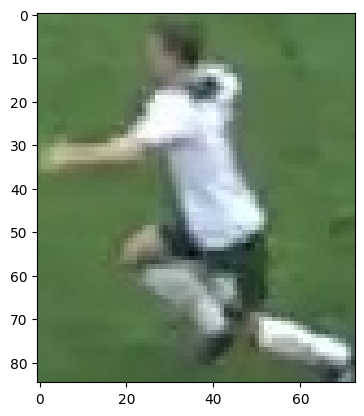

In [15]:
plt.imshow(image)
plt.show()

# Take the top half of the image

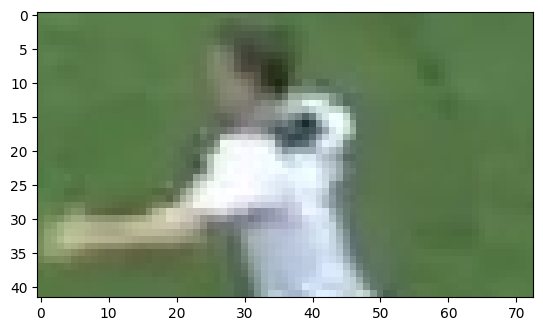

In [17]:
top_half_image = image[0: int(image.shape[0] / 2), :]
plt.imshow(top_half_image)

# Cluster the image into two clusters

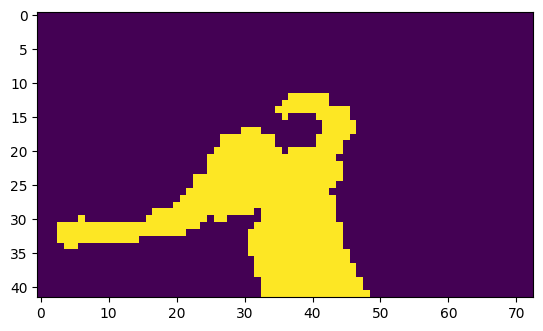

In [21]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

# Get the cluster labels
labels = kmeans.labels_

# Reshape the labels back to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [25]:
corner_cluster = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
print("Non player cluster:", non_player_cluster)

Non player cluster: 0


In [26]:
player_cluster = 1 - non_player_cluster
print("Player cluster:", player_cluster)

Player cluster: 1


In [27]:
kmeans.cluster_centers_[player_cluster]

array([198.99614644, 208.74759152, 211.15414258])